<a href="https://colab.research.google.com/github/KCY132/HW/blob/main/0530_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-b01d763afb6a>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
<ipython-input-3-b01d763afb6a>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
<ipython-input-3-b01d763afb6a>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    2   2            2   25.355     5
1   47    1   1            2   13.093     3
2   47    1   1            2   10.114     3
3   28    2   0            2    7.798     4
4   61    2   1            2   18.043     5
테스트셋 정확도: 1.000


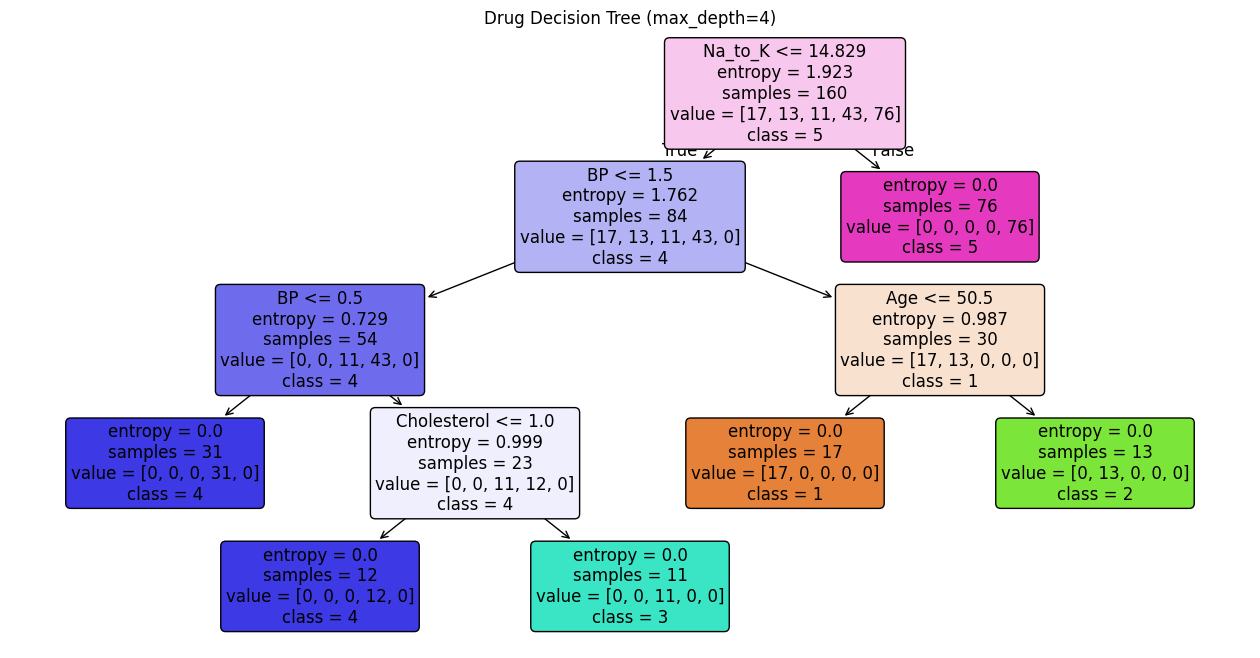

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drug200.csv')

# 2. 직접 매핑 방식으로 문자형 변수 숫자로 변환
df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Drug'] = df['Drug'].replace({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5})

print(df.head())  # 변환 결과 확인

# 3. 특성/타겟 분리
X = df.drop('Drug', axis=1)
y = df['Drug']

# 4. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 결정트리 모델 생성 및 학습
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'테스트셋 정확도: {acc:.3f}')

# 7. 트리 시각화
plt.figure(figsize=(16,8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(i) for i in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Drug Decision Tree (max_depth=4)")
plt.show()
